In [1]:
import pymongo
import pandas as pd

In [5]:
# Tunnel from wbes2474 to server07  -> ssh -NL 27018:localhost:27017 wbes2474
client = pymongo.MongoClient(port=27018)  # host=wbes2474')

In [6]:
db = client['nlp']
collection = db['metadata']

In [7]:
collection.count_documents({})

263812

# Backup existing collection of complete metadata

In [15]:
full_cursor = collection.find({})
all_docs = [doc for doc in full_cursor]

assert(len(all_docs) > 200000)

In [5]:
# all_docs = pd.read_csv('wbes2474_mongodb_collection_metadata_complete-2019-10-29 17:38:42.663141.csv')
# all_docs = all_docs.fillna('').to_dict('records')

In [10]:
if all_docs:
    pd.DataFrame(all_docs).to_csv(f'wbes2474_mongodb_collection_metadata_complete-{pd.datetime.utcnow()}.csv', index=None)
    backup_collection = db[f'metadata-before-{pd.datetime.utcnow()}']
    backup_collection.insert_many(all_docs)

In [17]:
# col_res = collection.insert_many(all_docs)
# len(col_res.inserted_ids)

# Load and upsert new docs

In [11]:
metadata_complete = pd.read_csv('../CORPUS/WB/wb_metadata_complete.csv')
metadata_complete.drop('write_status', axis=1, inplace=True)
metadata_complete.rename(columns={'id': '_id'}, inplace=True)

sanitized_metadata_complete = metadata_complete.fillna('')

In [21]:
%%time
# https://stackoverflow.com/a/17533368
now = pd.datetime.utcnow().isoformat()

for document in sanitized_metadata_complete.to_dict('records'):
    collection.update_one(
        {"_id": document["_id"]},
        {
            "$setOnInsert": {"insertion_date": now},
            "$set": dict(list(document.items()) + [('last_update_date', now)])
        },
        upsert=True,
    )

CPU times: user 1min 40s, sys: 9.6 s, total: 1min 49s
Wall time: 5min 12s


In [22]:
collection.count_documents({})

236174

In [65]:
collection.count_documents({})

236174

In [46]:
collection.count_documents({})

209735

In [12]:
len(all_docs), collection.count_documents({})

(209735, 236174)

### ----------- Finished -----------

In [23]:
collection.find_one({'_id': 'wb_19200456'})

{'_id': 'wb_19200456',
 'corpus': 'wb',
 'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_19200456.txt',
 'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_19200456.txt',
 'filename_original': 'RAD639317460.txt',
 'year': 2014.0,
 'major_doc_type': 'Project Documents',
 'doc_type': 'Agreement',
 'author': '',
 'collection': '',
 'title': 'Official Documents - Amendment to the Supplemental Letter No. 2 for Perfomance Monitoring Ref. Extension of the Closing Date for Loan 7516-AZ',
 'journal': '',
 'volume': '',
 'date_published': '2014-01-07',
 'digital_identifier': '090224b0822f74cd',
 'topics_src': '',
 'url_pdf': 'http://documents.worldbank.org/curated/en/137571468221085622/pdf/RAD639317460.pdf',
 'url_txt': 'http://documents.worldbank.org/curated/en/137571468221085622/text/RAD639317460.txt',
 'language_src': 'English',
 'adm_region': 'Europe and Central Asia',
 'geo_region': '',
 'country': 'Azerbaijan',
 'wb_lending_instrument': 'Specific Investment Loan',
 'wb_product_line': 'IBRD/IDA',
 'wb

In [76]:
collection.find_one({'_id': 'wb_19200456'})

{'_id': 'wb_19200456',
 'corpus': 'wb',
 'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_19200456.txt',
 'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_19200456.txt',
 'filename_original': 'RAD639317460.txt',
 'year': 2014.0,
 'major_doc_type': 'Project Documents',
 'doc_type': 'Agreement',
 'author': '',
 'collection': '',
 'title': 'Official Documents - Amendment to the Supplemental Letter No. 2 for Perfomance Monitoring Ref. Extension of the Closing Date for Loan 7516-AZ',
 'journal': '',
 'volume': '',
 'date_published': '2014-01-07',
 'digital_identifier': '090224b0822f74cd',
 'topics_src': '',
 'url_pdf': 'http://documents.worldbank.org/curated/en/137571468221085622/pdf/RAD639317460.pdf',
 'url_txt': 'http://documents.worldbank.org/curated/en/137571468221085622/text/RAD639317460.txt',
 'language_src': 'English',
 'adm_region': 'Europe and Central Asia',
 'geo_region': '',
 'country': 'Azerbaijan',
 'wb_lending_instrument': 'Specific Investment Loan',
 'wb_product_line': 'IBRD/IDA',
 'wb

In [66]:
collection.find_one({'_id': 'wb_19200456'})

{'_id': 'wb_19200456',
 'corpus': 'wb',
 'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_19200456.txt',
 'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_19200456.txt',
 'filename_original': 'RAD639317460.txt',
 'year': 2014.0,
 'major_doc_type': 'Project Documents',
 'doc_type': 'Agreement',
 'author': nan,
 'collection': nan,
 'title': 'Official Documents - Amendment to the Supplemental Letter No. 2 for Perfomance Monitoring Ref. Extension of the Closing Date for Loan 7516-AZ',
 'journal': nan,
 'volume': nan,
 'date_published': '2014-01-07',
 'digital_identifier': '090224b0822f74cd',
 'topics_src': nan,
 'url_pdf': 'http://documents.worldbank.org/curated/en/137571468221085622/pdf/RAD639317460.pdf',
 'url_txt': 'http://documents.worldbank.org/curated/en/137571468221085622/text/RAD639317460.txt',
 'language_src': 'English',
 'adm_region': 'Europe and Central Asia',
 'geo_region': nan,
 'country': 'Azerbaijan',
 'wb_lending_instrument': 'Specific Investment Loan',
 'wb_product_line': 'IBRD/IDA'

In [37]:
collection.find_one({'_id': 'wb_19200456'})

{'_id': 'wb_19200456',
 'corpus': 'wb',
 'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_19200456.txt',
 'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_19200456.txt',
 'filename_original': 'RAD639317460.txt',
 'year': 2014.0,
 'major_doc_type': 'Project Documents',
 'doc_type': 'Agreement',
 'author': 'Youness,Ghada',
 'collection': '',
 'title': 'Official Documents - Amendment to the Supplemental Letter No. 2 for Perfomance Monitoring Ref. Extension of the Closing Date for Loan 7516-AZ',
 'journal': '',
 'volume': '',
 'date_published': '2014-01-07',
 'digital_identifier': '090224b0822f74cd',
 'topics_src': '',
 'url_pdf': 'http://documents.worldbank.org/curated/en/137571468221085622/pdf/RAD639317460.pdf',
 'url_txt': 'http://documents.worldbank.org/curated/en/137571468221085622/text/RAD639317460.txt',
 'language_src': 'English',
 'adm_region': 'Europe and Central Asia',
 'geo_region': '',
 'country': 'Azerbaijan',
 'wb_lending_instrument': 'Specific Investment Loan',
 'wb_product_line': 'IB

In [24]:
failed_docs = [i['_id'] for i in collection.find({'title': { "$exists" : False }}, projection=['_id'])]

In [25]:
collection.count_documents({}) - len(failed_docs)

209735

In [31]:
failed_docs[:10]

['wb_30783183',
 'wb_31242811',
 'wb_31189916',
 'wb_30275855',
 'wb_30877061',
 'wb_30517602',
 'wb_30499771',
 'wb_15100242',
 'wb_29821318',
 'wb_31449058']

In [32]:
collection.find_one({'_id': 'wb_31242811'})

{'_id': 'wb_31242811',
 'insertion_date': datetime.datetime(2019, 10, 29, 17, 39, 44, 412000),
 'last_update_date': datetime.datetime(2019, 10, 29, 17, 39, 44, 412000)}

In [79]:
collection.find_one({'_id': 'wb_30429148'})

In [82]:
mcomp = pd.read_csv('../CORPUS/WB/wb_metadata_complete.csv')

In [86]:
mcomp[mcomp['id'] == 'wb_30429148']

,id,corpus,path_original,path_clean,filename_original,year,major_doc_type,doc_type,author,collection,...,wb_product_line,wb_major_theme,wb_theme,wb_sector,wb_subtopic_src,wb_project_id,language_detected,language_score,tokens,write_status


In [33]:
deleted_count = collection.delete_many({'title': { "$exists" : False }})

In [35]:
deleted_count.raw_result

{'n': 26439, 'ok': 1.0}

In [36]:
collection.count_documents({})

209735

In [87]:
deleted_count.raw_result

{'n': 26439, 'ok': 1.0}

In [39]:
metadata_complete.head().to_dict('records')

[{'_id': 'wb_19200456',
  'corpus': 'wb',
  'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_19200456.txt',
  'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_19200456.txt',
  'filename_original': 'RAD639317460.txt',
  'year': 2014.0,
  'major_doc_type': 'Project Documents',
  'doc_type': 'Agreement',
  'author': nan,
  'collection': nan,
  'title': 'Official Documents - Amendment to the Supplemental Letter No. 2 for Perfomance Monitoring Ref. Extension of the Closing Date for Loan 7516-AZ',
  'journal': nan,
  'volume': nan,
  'date_published': '2014-01-07',
  'digital_identifier': '090224b0822f74cd',
  'topics_src': nan,
  'url_pdf': 'http://documents.worldbank.org/curated/en/137571468221085622/pdf/RAD639317460.pdf',
  'url_txt': 'http://documents.worldbank.org/curated/en/137571468221085622/text/RAD639317460.txt',
  'language_src': 'English',
  'adm_region': 'Europe and Central Asia',
  'geo_region': nan,
  'country': 'Azerbaijan',
  'wb_lending_instrument': 'Specific Investment Loan',
  'wb_p

In [20]:
len(collection.find_one({'year': 2017}))

32

In [37]:
collection.find_one({'year': 2017})

{'_id': 'imf_0014531c0ebcc88b9249f54029b7b78c0ef9f8f8',
 'corpus': 'imf',
 'path_original': '/NLP/CORPUS/IMF/TXT_ORIG/imf_0014531c0ebcc88b9249f54029b7b78c0ef9f8f8.txt',
 'path_clean': '/NLP/CORPUS/IMF/TXT_CLEAN/imf_0014531c0ebcc88b9249f54029b7b78c0ef9f8f8.txt',
 'filename_original': 'cr17203.ashx',
 'year': 2017,
 'major_doc_type': '',
 'doc_type': '',
 'author': 'International Monetary Fund. Middle East and Central Asia Dept.',
 'collection': '',
 'title': 'Tunisia : First Review Under the Extended Fund Facility, Request for Waivers of NonObservance of Performance Criteria and Rephasing of Access-Press Release,Staff Report,and Statement by the Executive Director for Tunisia',
 'journal': '',
 'volume': '',
 'date_published': '07/10/2017',
 'digital_identifier': '9781484308653/1934-7685',
 'topics_src': '',
 'url_pdf': 'http://www.imf.org/~/media/Files/Publications/CR/2017/cr17203.ashx',
 'url_txt': '',
 'language_src': 'English',
 'adm_region': '',
 'geo_region': '',
 'country': '',
 

In [12]:
q = collection.find(filter={'wb_lending_instrument': {'$regex': 'Development Policy Lending', '$options': 'i'}}, projection=['_id', 'year', 'url_txt'])

In [13]:
next(q)

{'_id': 'wb_10008414',
 'year': 2008.0,
 'url_txt': 'http://documents.worldbank.org/curated/en/678891468004828991/text/PID0PCN0Albani1O0final0for0InfoShop.txt'}

In [6]:
q = collection.find(filter={'major_doc_type': 'Publications & Research'}, projection=['_id', 'year'])

In [7]:
import pandas as pd

In [8]:
c = collection.find({'year': 2017}, limit=2)

In [9]:
import requests
import json

In [10]:
headers = {"Content-Type": "application/json", "Accept": "application/json"}
# headers = {"Content-Type": "*", "Accept": "*"}

# headers = {}
url = 'http://localhost:8910/api/related_docs_by_id'
# url = 'http://localhost:8910/api/get_models'

In [11]:
# f = open('../../Corpus/IMF/pdf/47c9e087d9025bf41d2ad5bcc8369d516ee5df17.pdf', 'rb')

In [12]:
# raw_text=climate+change&corpus_id=WB&model_id=ALL_100&topn=10&clean_doc=true&use_ngram=true

In [13]:
# %%time
# url = 'http://localhost:8910/api/get_models'
# data = requests.post(
#     url, headers=headers
# )
# print(data.json())

# # url = 'http://localhost:8910/api/related_words'
# # data = requests.post(
# #     url, json={'raw_text': 'big data'},
# #     headers=headers
# # )
# # print(data.json())

In [14]:
%matplotlib inline

In [15]:
from hashlib import md5
import uuid

In [16]:
from datetime import datetime

In [29]:
%%time
url = 'http://localhost:8910/api/lda_compare_partition_topic_share' #_by_id'

data = requests.post(
    url,
    json = {
        'model_id': 'PR_100',
        'corpus_id': 'WB',
        'topic_id': 4,
        'year_start': 1950,
        'adm_regions': ['Africa', 'East Asia and Pacific', 'Middle East and North Africa'],
    },
    headers=headers
)


CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 6.93 s


In [31]:
data.json()['topic_words']

[{'score': 0.06032885257209435, 'word': 'education'},
 {'score': 0.05253730774293888, 'word': 'training'},
 {'score': 0.0423625229106145, 'word': 'skill'},
 {'score': 0.03035191061271486, 'word': 'university'},
 {'score': 0.025932701019235685, 'word': 'high'},
 {'score': 0.019059069922867846, 'word': 'institution'},
 {'score': 0.018042276449883758, 'word': 'student'},
 {'score': 0.01213719027857282, 'word': 'graduate'},
 {'score': 0.01210830071592506, 'word': 'vocational'},
 {'score': 0.010432110421269389, 'word': 'quality'}]

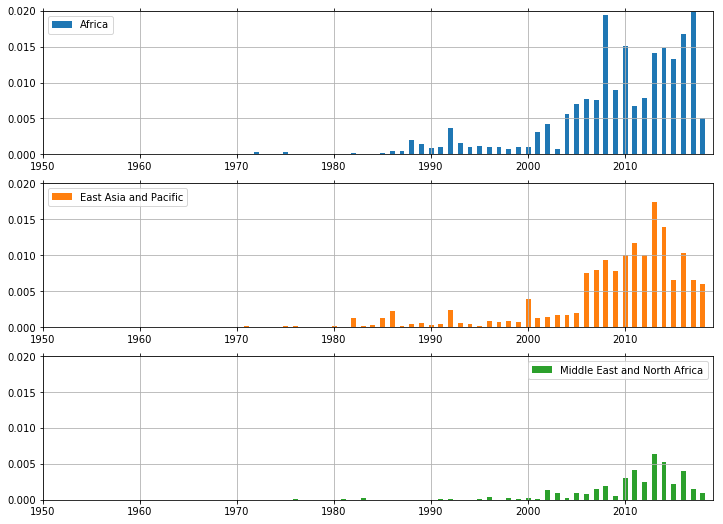

In [18]:
import pylab as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df = pd.DataFrame(data.json()['topic_shares'])
df.index = pd.to_datetime(df.index)

year_mark = 10
axs = df.plot(kind='bar', subplots=True, figsize=(12, df.shape[1] * 3), ylim=(0, 0.02))

for ax in axs:
    ax.set_title('')
    
    # ticklabels = [''] * len(df)
    # skip = df.shape[0] // 5 
    # ticklabels = df.reset_index()['index'].iloc[::skip].dt.strftime('%Y').values
    # ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
    # ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(df.shape[0]))[::skip]))
    
    ax.xaxis.set_tick_params(reset=True)
    
    ticks_pos, ticks_labels = zip(*[(i, j) for i, j in enumerate(df.reset_index()['index'].dt.strftime('%Y')) if int(j) % year_mark == 0])
    ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticks_labels))
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_pos))
    ax.set_xlim((0, df.shape[0]))

    # ax.figure.autofmt_xdate()
    ax.grid()
    plt.xticks(rotation=0)

plt.savefig('../../test_save.png')

In [52]:
f = ax.get_figure()

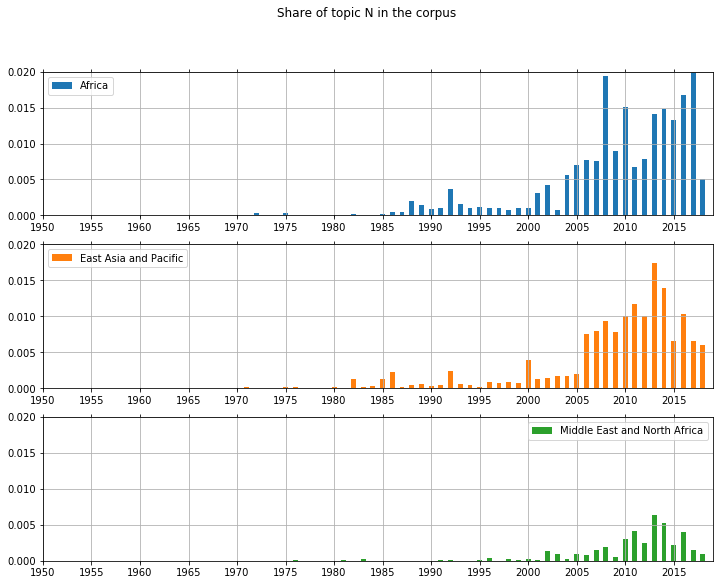

In [57]:
f.gca()
f

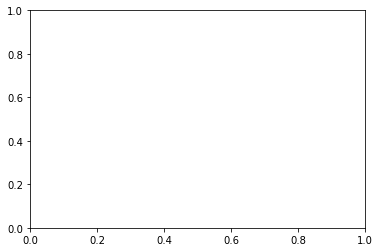

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)  # The big subplot

In [42]:
fig.add_axes?

In [31]:
list(range(df.shape[0]))[::skip]

[0, 13, 26, 39, 52, 65]

In [30]:
df.reset_index()['index'].iloc[::skip].dt.strftime('%Y')

0     1950
13    1963
26    1976
39    1989
52    2002
65    2015
Name: index, dtype: object

In [93]:
u = uuid.uuid4()
u.hex

'8df716e86b294e96a6b1f601e1baad9f'

In [97]:
pd.np.round(df.max().max(), 2)

0.02

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', freq=None)

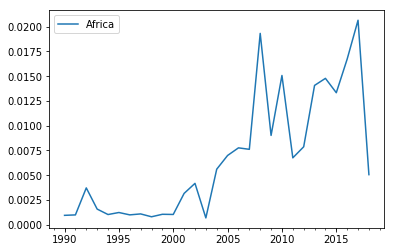

In [108]:
df[['Africa']].plot()

In [224]:

# figure = plt.figure(figsize=(12, 3 * df.shape[1]))
# df.index = pd.to_datetime(df.index)
# ymax = pd.np.round(df.max().max(), 2) + 0.005
# for ix, part in enumerate(df.columns):
#     ax = figure.add_subplot(int(f'{df.shape[1]}1{ix + 1}'))
#     d = df[[part]].reset_index().rename(columns={'index': 'year'}).set_index('year')

#     if (ix + 1) < df.shape[1]:
#         d.plot(kind='bar', ax=ax, ylim=(0, ymax))
#         ax.xaxis.set_ticklabels([''] * d.shape[0])
#         ax.xaxis.set_label_text('')

#     else:
#         d.plot(kind='bar', ax=ax, ylim=(0, ymax))
        
#     ax.grid()


In [209]:
def format_x_date_month_day(ax):   
    # Standard date x-axis formatting block, labels each month and ticks each day
    days = mdates.DayLocator()
    months = mdates.MonthLocator()  # every month
    dayFmt = mdates.DateFormatter('%D')
    monthFmt = mdates.DateFormatter('%Y-%m')
    ax.figure.autofmt_xdate()
    ax.xaxis.set_major_locator(months) 
    ax.xaxis.set_major_formatter(monthFmt)
    ax.xaxis.set_minor_locator(days)


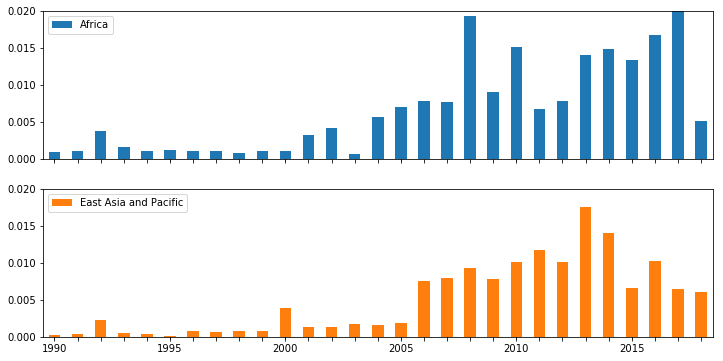

In [223]:
# figure = plt.figure(figsize=(12, 3 * df.shape[1]))
# aax = figure.gca()
axs = df.plot(kind='bar', subplots=True, figsize=(12, 6), ylim=(0, 0.02))

for ax in axs:
    ax.set_title('')
#     ax.xaxis.set_tick_params(reset=True)
#     ax.xaxis.set_major_locator(mdates.YearLocator(5))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    ticklabels = ['']*len(df)
    skip = len(df)//5 
    ticklabels[::skip] = df.reset_index()['index'].iloc[::skip].dt.strftime('%Y')
    ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
    ax.xaxis.set_tick_params({'rot':40})
#     ax.figure.autofmt_xdate()
    plt.xticks(rotation=0)
plt.savefig('../../test_save.png')
#     format_x_date_month_day(ax)

In [ ]:
df.res

In [176]:
t = ax.xaxis.get_ticklabels()
t

<a list of 0 Text major ticklabel objects>

In [167]:
figure.savefig('../../test_save.png')

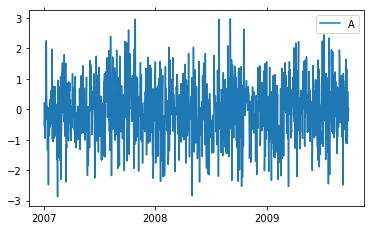

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = pd.date_range('20070101',periods=1000)
df = pd.DataFrame(np.random.randn(1000), index = dates, columns =list ('A'))

fig,ax = plt.subplots()
df.plot(x_compat=True,ax=ax)

ax.xaxis.set_tick_params(reset=True)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

In [100]:
figure.savefig('../../test_save.png', tight_layout=True)

In [30]:
figure.add_axes()

In [24]:
figure.add_subplot?

In [38]:
figure.axes.extend(axes)

In [40]:
figure.add_subplot?

In [261]:
%%time
# url = 'http://localhost:8910/api/related_words'
url = 'http://localhost:8910/api/lda_related_docs_by_id' #_by_id'

data = requests.post(
    url,
    json = {
        'model_id': 'PR_100',
        'corpus_id': 'WB',
        'use_ngram':True,
        'topn': 20,
        'clean_doc': True,
        'id': 'wb_20410718'
#         'raw_text': 'purchasing power parity',
    },
#     data=json.dumps({'file': 'asda', 'topn': 10}),

#     files={'file': f},
    headers=headers
)

# if data.status_code != 200:
#     return {}

# text = data.json()['text']
data.json()

CPU times: user 8 ms, sys: 2 ms, total: 10 ms
Wall time: 1.96 s


In [262]:
data.json()

{'docs': [{'id': 'wb_20410718',
   'metadata': {'_id': 'wb_20410718',
    'adm_region': 'Europe and Central Asia',
    'author': '',
    'collection': 'Poverty & shared prosperity at a glance',
    'corpus': 'wb',
    'country': 'Europe and Central Asia',
    'date_published': '2014-09-01',
    'digital_identifier': '090224b0828bf485',
    'doc_type': 'Brief',
    'filename_original': '914930BRI0Box300AAG0TJK0120Nov02014.txt',
    'geo_region': '',
    'journal': '',
    'language_detected': 'en',
    'language_score': 0.9999946228994799,
    'language_src': 'English',
    'major_doc_type': 'Publications & Research',
    'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_20410718.txt',
    'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_20410718.txt',
    'title': 'Tajikistan - Poverty & shared prosperity at a glance',
    'tokens': 436.0,
    'topics_src': 'Poverty Reduction,Information and Communication Technologies,Health, Nutrition and Population',
    'url_pdf': 'http://documents.worldbank.o

In [235]:
headers = {"Content-Type": "application/json", "Accept": "application/json"}
url = 'http://localhost:8910/api/clean_text'
tx = requests.post(url, json={'raw_text': 'Joint United Nations Programme on HIV/AIDS'}, headers=headers)
tx.json()

{'exception': None,
 'lang': ['fr', 0.714283586925445],
 'ngram_text': 'joint united_nation programme hiv aid',
 'skipped': 'Not in english | fr:0.714283586925445',
 'spell_errors': [],
 'text': 'joint united nation programme hiv aid',
 'token': 0,
 'write_status': False}

In [229]:
%%time
headers = {"Content-Type": "application/json", "Accept": "application/json"}
url = 'http://localhost:8910/api/fetch_text'
tx = requests.post(url, json={'corpus_id': 'WB', 'doc_id': 'wb_734846'}, headers=headers)
print(tx.json()['text'])

Egypt
Financial Policy for Adjustment
and Growth
Volume 11 Financial Intermediaries
September 20, 1993
Country Department 11 (MN2)
Country Operations
Middle East and North Africa Region
FOR OFFICIAL USE ONLY
00
in         ... D  f     oi
'isclosed without World Rank authcgization
- I         .  )                C            
* I2 S1



CURRENCY EOUIVALENTS
Currency Unit - Egyptian Pound (LE)
LE per US Dollar
(average)
1991 3.009
1992 3.323
August 1993 3.348 (actual)
FISg& YEAR
July 1 - June 30
LIST OF ABBREVIATIONS
BCCI                 Bank of Credit and Commerce International
BCCM                 Bank of Credit and Commerce Misr
ChO                  Central Audit Organization
CAPMAS               Central Authority for Public Mobilization and
Statistics (Central Government's Bureau of
Statistics)
CBE                  Central Bank of Egypt
CLG                  Central and Local Government
CMA                  Capital Market Authority
CML                  Capital Markets Law
CSI        

Egypt
Financial Policy for Adjustment
and Growth
Volume 11 Financial Intermediaries
September 20, 1993
Country Department 11 (MN2)
Country Operations
Middle East and North Africa Region
FOR OFFICIAL USE ONLY
00
in         ... D  f     oi
'isclosed without World Rank authcgization
- I         .  )                C            
* I2 S1



CURRENCY EOUIVALENTS
Currency Unit - Egyptian Pound (LE)
LE per US Dollar
(average)
1991 3.009
1992 3.323
August 1993 3.348 (actual)
FISg& YEAR
July 1 - June 30
LIST OF ABBREVIATIONS
BCCI                 Bank of Credit and Commerce International
BCCM                 Bank of Credit and Commerce Misr
ChO                  Central Audit Organization
CAPMAS               Central Authority for Public Mobilization and
Statistics (Central Government's Bureau of
Statistics)
CBE                  Central Bank of Egypt
CLG                  Central and Local Government
CMA                  Capital Market Authority
CML                  Capital Markets Law
CSI        

In [221]:
data.json()

{'docs': [{'id': 'wb_1560807',
   'metadata': {'_id': 'wb_1560807',
    'adm_region': 'Africa',
    'author': '',
    'collection': '',
    'corpus': 'wb',
    'country': 'Senegal',
    'date_published': '1973-08-15',
    'digital_identifier': '090224b0828ce8a4',
    'doc_type': 'Pre-2003 Economic or Sector Report',
    'filename_original': 'multi0page.txt',
    'geo_region': 'West Africa|West Africa|West Africa|West Africa',
    'journal': '',
    'language_detected': 'en',
    'language_score': 0.9999948186093301,
    'language_src': 'English',
    'major_doc_type': 'Economic & Sector Work',
    'path_clean': '/NLP/CORPUS/WB/TXT_CLEAN/wb_1560807.txt',
    'path_original': '/NLP/CORPUS/WB/TXT_ORIG/wb_1560807.txt',
    'title': 'Senegal - The economy : The main report',
    'tokens': 28801.0,
    'topics_src': 'Environment,Public Sector Development,Finance and Financial Sector Development,Macroeconomics and Economic Growth',
    'url_pdf': 'http://documents.worldbank.org/curated/en/675